In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/applai-summer-contest-a/Sample_Submission.csv
/kaggle/input/applai-summer-contest-a/Training_Data.csv
/kaggle/input/applai-summer-contest-a/Test_Data.csv


In [2]:
# load the data 
df  = pd.read_csv("/kaggle/input/applai-summer-contest-a/Training_Data.csv")
print("what is the shape of the data", df.shape)

print("list of the columns", df.columns)
df.head()

what is the shape of the data (1600, 22)
list of the columns Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,401,842,0,2.2,0,1,0,7,0.6,188.0,...,20,756,2549,9,7,19,0,0,1,0
1,402,1021,1,0.5,1,0,1,53,0.7,136.0,...,905,1988,2631,17,3,7,1,1,0,1
2,403,563,1,0.5,1,2,1,41,0.9,145.0,...,1263,1716,2603,11,2,9,1,1,0,1
3,404,615,1,2.5,0,0,0,10,0.8,131.0,...,1216,1786,2769,16,8,11,1,0,0,1
4,405,1821,1,1.2,0,13,1,44,0.6,141.0,...,1208,1212,1411,8,2,15,1,1,0,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_range', ylabel='count'>

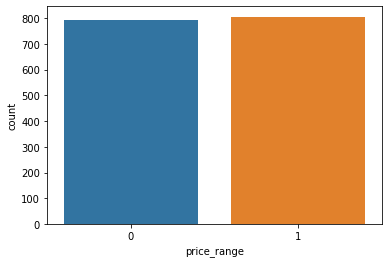

In [3]:
## we need to predict if price is high or low 
import seaborn as sns
sns.countplot(df.price_range)

In [4]:
## how many nulls we have 
df.isna().sum()

id                  0
battery_power       0
blue                0
clock_speed      1336
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt          30
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range         0
dtype: int64

In [5]:
## we will drop the Nulls of clockspeed
df.drop("clock_speed", axis=1, inplace = True)


In [6]:
df['mobile_wt'].fillna(0, inplace = True)

In [7]:
## target is price range 
## let us randomForest for this problem
## classifier 

X = df.drop("price_range", axis = 1)
y = df['price_range']

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# we will add xgboost 
from xgboost import XGBClassifier
model  = XGBClassifier()
model.fit(X,y)

[21:52:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
## test the model 
test = pd.read_csv("/kaggle/input/applai-summer-contest-a/Test_Data.csv")

In [10]:
print("shape of the test dataset", test.shape)
print("columns in test dataset", test.columns)

# drop the clockspeed
test.drop("clock_speed", axis=1, inplace=True)
test['mobile_wt'].fillna(0, inplace =True)

# create test feature set
#x_test = test.drop("price_range")
#y_test = test['price_range']

shape of the test dataset (400, 21)
columns in test dataset Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [11]:
y_pred = model.predict(test)

In [12]:
my_submission = pd.DataFrame({'Id': test.id, 'price_range': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [13]:
# This is a quick and very naive way to compelete  the project. 
# But it covers most of the thing, we want to tell
